### Student Information
Name: Federico Ferraro

Student ID: a14521203

GitHub ID: FreezieNinja (link: https://github.com/FreezieNinja/)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Imports

In [17]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical test to compare distributions
from scipy.stats import chi2_contingency

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

[nltk_data] Downloading package punkt to /home/federico/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [4]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/home/federico/Desktop/DataMining/.venv/bin/python
3.13.3 (main, Aug 14 2025, 11:53:40) [GCC 14.2.0]


## Data import and verification

In [5]:
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
df.head()  # Verify correct import of the data

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [6]:
categories = ['positive', 'neutral', 'negative']

Note: The categories will be based on the sentiment column to classify the records as follows:
- 1.0 is positive
- 0.0 is neutral
- -1.0 is negative

Let us verify that indeed all the values are in one of these:

In [7]:
unique_sentiments = df['sentiment'].unique()
sorted_sentiments = np.sort(unique_sentiments)
print("Unique sentiment values:", sorted_sentiments)

# Additional verification
is_valid = df['sentiment'].isin([-1.0, 0.0, 1.0]).all()
print("\nAll sentiment values are valid:", is_valid)

# If there are invalid values, this will show them
if not is_valid:
    invalid_sentiments = df[~df['sentiment'].isin([-1.0, 0.0, 1.0])]
    print("\nInvalid sentiment values found:")
    print(invalid_sentiments[['sentiment']])

Unique sentiment values: [-1.  0.  1.]

All sentiment values are valid: True


## Data cleaning

In [8]:
# Remove unnecessary columns for our analysis
columns_to_remove = ['datetime', 'post_id', 'url']
df = df.drop(columns=columns_to_remove)

# Verify the columns were removed
print("Remaining columns:", df.columns.tolist())
print(f"Dataframe shape after removal: {df.shape}")

Remaining columns: ['type', 'subreddit', 'title', 'author', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
Dataframe shape after removal: (847, 13)


The removed columns are either identifiers or temporal data that does not seem necessary in order to classify the data in the categories that were explicited above.

The following code will verify the presence of missing data.

In [9]:
# Count missing values for each column
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts)

# Calculate percentage of missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
for col, count, pct in zip(df.columns, missing_counts, missing_percentages):
    print(f"{col}: {count} ({pct:.2f}%)")

# Summary
total_missing = missing_counts.sum()
print(f"\nTotal missing values in dataset: {total_missing}")
print(f"Columns with missing data: {(missing_counts > 0).sum()}")
print(f"Columns with no missing data: {(missing_counts == 0).sum()}")

Missing values per column:
type              0
subreddit         0
title             0
author            0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

Percentage of missing values per column:
type: 0 (0.00%)
subreddit: 0 (0.00%)
title: 0 (0.00%)
author: 0 (0.00%)
upvotes: 0 (0.00%)
downvotes: 783 (92.44%)
upvote_ratio: 783 (92.44%)
text: 0 (0.00%)
subjectivity: 0 (0.00%)
polarity: 0 (0.00%)
sentiment: 0 (0.00%)
entities: 0 (0.00%)
label: 0 (0.00%)

Total missing values in dataset: 1566
Columns with missing data: 2
Columns with no missing data: 11


As we notice a missingness of 92% in both downvotes and upvote_ratio, these columns do not bring much information and are difficult to impute: when the upvote_ratio is obtained with the formula: $upvote\_ratio = \frac{upvotes}{upvotes + downvotes}$.

It is possible to define imputation techniques based on other columns, it is also possible to keep the columns and let the successive pipeline handle the missing values, but in this case, given the overwhelming missingness, the easiest would be to delete the columns.

To verify that the missingness of data does not hold significant meaning, let's run statistical tests:

Dataset comparison:
Complete records (no missing downvotes/upvote_ratio): 64
Missing records (missing downvotes and/or upvote_ratio): 783
Total records: 847

=== SENTIMENT FREQUENCIES ===

Complete Records:
Negative (-1.0): 2 records (3.1%)
Neutral (0.0): 41 records (64.1%)
Positive (1.0): 21 records (32.8%)

Missing Records:
Negative (-1.0): 195 records (24.9%)
Neutral (0.0): 290 records (37.0%)
Positive (1.0): 298 records (38.1%)


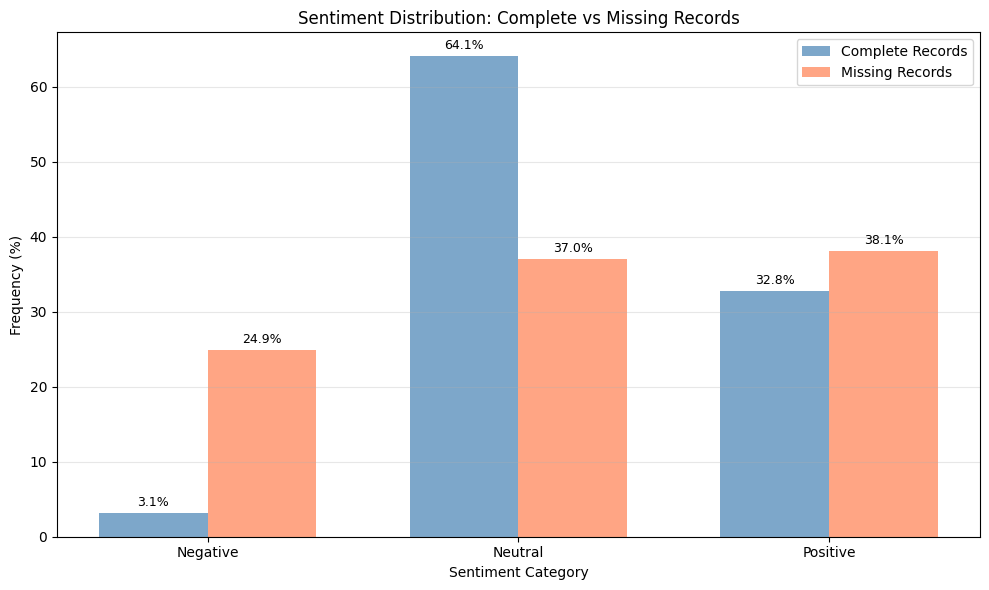

In [41]:
# Compare sentiment frequencies between complete and missing records
# Split dataset into complete and missing records for downvotes/upvote_ratio
df_complete = df.dropna(subset=['downvotes', 'upvote_ratio'])
df_missing = df[df[['downvotes', 'upvote_ratio']].isnull().any(axis=1)]

print("Dataset comparison:")
print(f"Complete records (no missing downvotes/upvote_ratio): {len(df_complete)}")
print(f"Missing records (missing downvotes and/or upvote_ratio): {len(df_missing)}")
print(f"Total records: {len(df)}")

# Calculate sentiment frequencies for complete records
complete_sentiment_counts = df_complete['sentiment'].value_counts().sort_index()
complete_sentiment_freq = df_complete['sentiment'].value_counts(normalize=True).sort_index() * 100

# Calculate sentiment frequencies for missing records
missing_sentiment_counts = df_missing['sentiment'].value_counts().sort_index()
missing_sentiment_freq = df_missing['sentiment'].value_counts(normalize=True).sort_index() * 100

print("\n=== SENTIMENT FREQUENCIES ===")
print("\nComplete Records:")
for sentiment, count, freq in zip(complete_sentiment_counts.index, complete_sentiment_counts.values, complete_sentiment_freq.values):
    label = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}[sentiment]
    print(f"{label} ({sentiment}): {count} records ({freq:.1f}%)")

print("\nMissing Records:")
for sentiment, count, freq in zip(missing_sentiment_counts.index, missing_sentiment_counts.values, missing_sentiment_freq.values):
    label = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}[sentiment]
    print(f"{label} ({sentiment}): {count} records ({freq:.1f}%)")

# Prepare data for visualization
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_values = [-1.0, 0.0, 1.0]

# Get frequencies for each group (fill missing values with 0)
complete_freqs = []
missing_freqs = []

for val in sentiment_values:
    complete_freqs.append(complete_sentiment_freq.get(val, 0))
    missing_freqs.append(missing_sentiment_freq.get(val, 0))
    
# Create the bar plot
fig = plt.figure(figsize=(10, 6))

# Plot: Side-by-side comparison
x = range(len(sentiment_labels))
width = 0.35

bars1 = plt.bar([i - width/2 for i in x], complete_freqs, width, 
                label='Complete Records', color='steelblue', alpha=0.7)
bars2 = plt.bar([i + width/2 for i in x], missing_freqs, width,
                label='Missing Records', color='coral', alpha=0.7)

plt.xlabel('Sentiment Category')
plt.ylabel('Frequency (%)')
plt.title('Sentiment Distribution: Complete vs Missing Records')
plt.xticks(x, sentiment_labels)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


We can conclude from the tests that the missingness of the data could hold significance in the sentiment category. For example a negative post could be taken down by a moderator, by the user or the user could delete their account, resulting in missing downvotes.

Despite this, the amount of records that are not missing being extremely limited, less than 8% of the total records, let us discard the records with missing values.

In [11]:
# Drop columns with high missingness
columns_to_drop = ['downvotes', 'upvote_ratio']
df_clean = df.drop(columns=columns_to_drop)

# Verify the shape of the new dataframe
print(f"Original dataframe shape: {df.shape}")
print(f"Clean dataframe shape: {df_clean.shape}")

# Verify that the columns were dropped
print("\nRemaining columns:")
print(df_clean.columns.tolist())


Original dataframe shape: (847, 13)
Clean dataframe shape: (847, 11)

Remaining columns:
['type', 'subreddit', 'title', 'author', 'upvotes', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


## Data Visualisation

In [24]:
# Plot sentiment category distribution using Plotly

# Create sentiment labels for better visualization
df_clean['sentiment_label'] = df_clean['sentiment'].map({
    -1.0: 'Negative',
    0.0: 'Neutral', 
    1.0: 'Positive'
})

# Calculate value counts and percentages
sentiment_counts = df_clean['sentiment_label'].value_counts()
sentiment_percentages = df_clean['sentiment_label'].value_counts(normalize=True) * 100

print("Sentiment Distribution:")
for label, count, pct in zip(sentiment_counts.index, sentiment_counts.values, sentiment_percentages.values):
    print(f"{label}: {count} records ({pct:.1f}%)")

# Create subplots with two charts side by side
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Count Distribution', 'Percentage Distribution'),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# Bar chart for counts
colors = ['#888888', '#44ff44', '#ff4444']  # Gray, Green, Red
fig.add_trace(
    go.Bar(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        marker_color=colors,
        name='Count',
        text=sentiment_counts.values,
        textposition='auto'
    ),
    row=1, col=1
)

# Pie chart for percentages
fig.add_trace(
    go.Pie(
        labels=sentiment_counts.index,
        values=sentiment_counts.values,
        marker_colors=colors,
        name='Percentage',
        textinfo='label+percent',
        textposition='auto'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Sentiment Category Distribution",
    title_x=0.5,
    height=400,
    showlegend=False
)

# Update x-axis and y-axis for bar chart
fig.update_xaxes(title_text="Sentiment Category", row=1, col=1)
fig.update_yaxes(title_text="Number of Records", row=1, col=1)

fig.show()


Sentiment Distribution:
Neutral: 331 records (39.1%)
Positive: 319 records (37.7%)
Negative: 197 records (23.3%)


In [52]:
# Create document-term frequency matrix based on Master notebook approach

# Initialize CountVectorizer and fit it to the text data
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_clean['text'])  # Learn vocabulary and return document-term matrix

print(f"Number of documents: {X_counts.shape[0]}")
print(f"Number of unique terms in vocabulary: {X_counts.shape[1]}")

# Get all feature names (terms) - this creates our dictionary of terms
all_terms = count_vect.get_feature_names_out()

# Calculate term frequencies across all documents
term_frequencies = np.array(X_counts.sum(axis=0))[0]

# Get indices of top 50 most frequent terms, then find correspinding terms and frequencies
top_50_indices = np.argsort(term_frequencies)[::-1][:50]
top_50_terms = [all_terms[i] for i in top_50_indices]
top_50_frequencies = [term_frequencies[i] for i in top_50_indices]

print("\nTop 20 most frequent terms:")  # Here we limit to 20 so that everything can be printed to the console
for i, (term, freq) in enumerate(zip(top_50_terms[:20], top_50_frequencies[:20]), 1):
    print(f"{i:2d}. {term:15s}: {freq:4d} occurrences")

# Create document-term matrix for top 50 terms only
top_50_matrix = X_counts[:, top_50_indices].toarray()

print(f"\nDocument-term matrix for top 50 terms shape: {top_50_matrix.shape}")

# Create a DataFrame for better visualization of the document-term matrix
# Take first 10 documents and top 50 terms for visualization
sample_matrix_df = pd.DataFrame(
    top_50_matrix[:50, :],  # First 10 documents
    columns=top_50_terms,   # Top 50 terms as columns
    index=[f"Doc_{i}" for i in range(50)]  # Document labels
)

# Visualize the term frequencies
fig = px.bar(
    x=top_50_terms,
    y=top_50_frequencies,
    title="Top 50 Most Frequent Terms in Reddit Stock Sentiment Dataset",
    labels={'x': 'Terms', 'y': 'Frequency'},
    color=top_50_frequencies,
    color_continuous_scale='viridis'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    showlegend=False,
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

fig.show()

# Create a heatmap of the document-term matrix (sample)
fig_heatmap = go.Figure(data=go.Heatmap(
    z=sample_matrix_df.values,
    x=sample_matrix_df.columns,
    y=sample_matrix_df.index,
    colorscale='Viridis',
    colorbar=dict(title="Term Frequency")
))

fig_heatmap.update_layout(
    title="Document-Term Matrix Heatmap (First 50 Documents, Top 50 Terms)",
    xaxis_title="Terms",
    yaxis_title="Documents",
    height=600
)

fig_heatmap.update_xaxes(tickangle=-45)

fig_heatmap.show()

# Print summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
print(f"Matrix density: {(top_50_matrix > 0).sum() / top_50_matrix.size:.4f}")
print(f"Average terms per document: {(top_50_matrix > 0).sum(axis=1).mean():.2f}")
print(f"Most frequent term: '{top_50_terms[0]}' ({top_50_frequencies[0]} occurrences)")
print(f"Least frequent term in top 50: '{top_50_terms[-1]}' ({top_50_frequencies[-1]} occurrences)")

Number of documents: 847
Number of unique terms in vocabulary: 4346

Top 20 most frequent terms:
 1. the            :  920 occurrences
 2. to             :  566 occurrences
 3. and            :  488 occurrences
 4. is             :  402 occurrences
 5. it             :  350 occurrences
 6. of             :  311 occurrences
 7. in             :  286 occurrences
 8. that           :  238 occurrences
 9. for            :  214 occurrences
10. this           :  213 occurrences
11. you            :  195 occurrences
12. on             :  171 occurrences
13. are            :  155 occurrences
14. they           :  150 occurrences
15. be             :  134 occurrences
16. he             :  132 occurrences
17. will           :  127 occurrences
18. with           :  126 occurrences
19. if             :  119 occurrences
20. as             :  115 occurrences

Document-term matrix for top 50 terms shape: (847, 50)



=== SUMMARY STATISTICS ===
Matrix density: 0.1238
Average terms per document: 6.19
Most frequent term: 'the' (920 occurrences)
Least frequent term in top 50: 'up' (55 occurrences)


The code above is inspired from the Lab1-Master notebook and does the following:
- Creates the CountVectorizer and document-term matrix
- Identifies the top 50 most frequent terms
- Creates visualizations (bar chart and heatmap)
- Provides summary statistics

The following cell will do the same but remove the stopwords, to verify how influent these words are.

In [50]:
# Create document-term frequency matrix with stopwords removed

# Initialize CountVectorizer with stopwords removal
count_vect_no_stopwords = CountVectorizer(stop_words='english')
X_counts_no_stopwords = count_vect_no_stopwords.fit_transform(df_clean['text'])

print(f"=== WITH STOPWORDS REMOVED ===")
print(f"Number of documents: {X_counts_no_stopwords.shape[0]}")
print(f"Number of unique terms in vocabulary (no stopwords): {X_counts_no_stopwords.shape[1]}")

# Get all feature names (terms) without stopwords
all_terms_no_stopwords = count_vect_no_stopwords.get_feature_names_out()

# Calculate term frequencies across all documents
term_frequencies_no_stopwords = np.array(X_counts_no_stopwords.sum(axis=0))[0]

# Get indices of top 50 most frequent terms (without stopwords)
top_50_indices_no_stopwords = np.argsort(term_frequencies_no_stopwords)[::-1][:50]
top_50_terms_no_stopwords = [all_terms_no_stopwords[i] for i in top_50_indices_no_stopwords]
top_50_frequencies_no_stopwords = [term_frequencies_no_stopwords[i] for i in top_50_indices_no_stopwords]

print("\nTop 20 most frequent terms (without stopwords):")
for i, (term, freq) in enumerate(zip(top_50_terms_no_stopwords[:20], top_50_frequencies_no_stopwords[:20]), 1):
    print(f"{i:2d}. {term:15s}: {freq:4d} occurrences")

# Create document-term matrix for top 50 terms only (no stopwords)
top_50_matrix_no_stopwords = X_counts_no_stopwords[:, top_50_indices_no_stopwords].toarray()

print(f"\nDocument-term matrix for top 50 terms (no stopwords) shape: {top_50_matrix_no_stopwords.shape}")

# Visualize the term frequencies without stopwords
fig_no_stopwords = px.bar(
    x=top_50_terms_no_stopwords,
    y=top_50_frequencies_no_stopwords,
    title="Top 50 Most Frequent Terms (Stopwords Removed) in Reddit Stock Sentiment Dataset",
    labels={'x': 'Terms', 'y': 'Frequency'},
    color=top_50_frequencies_no_stopwords,
    color_continuous_scale='viridis'
)

fig_no_stopwords.update_layout(
    xaxis_tickangle=-45,
    height=600,
    showlegend=False,
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

fig_no_stopwords.show()

# Create a comparison visualization
fig_comparison = make_subplots(
    rows=1, cols=2,
    subplot_titles=('With Stopwords', 'Without Stopwords'),
    specs=[[{"type": "bar"}, {"type": "bar"}]]
)

# Top 20 terms with stopwords
fig_comparison.add_trace(
    go.Bar(
        x=top_50_terms[:20],
        y=top_50_frequencies[:20],
        name='With Stopwords',
        marker_color='steelblue'
    ),
    row=1, col=1
)

# Top 20 terms without stopwords
fig_comparison.add_trace(
    go.Bar(
        x=top_50_terms_no_stopwords[:20],
        y=top_50_frequencies_no_stopwords[:20],
        name='Without Stopwords',
        marker_color='steelblue'
    ),
    row=1, col=2
)

fig_comparison.update_layout(
    title_text="Comparison: Top 20 Terms With vs Without Stopwords",
    height=500,
    showlegend=False
)

fig_comparison.update_xaxes(tickangle=-45)
fig_comparison.show()


# Same but with log
log_comparison = make_subplots(
    rows=1, cols=2,
    subplot_titles=('With Stopwords', 'Without Stopwords'),
    specs=[[{"type": "bar"}, {"type": "bar"}]]
)

# Top 20 terms with stopwords
log_comparison.add_trace(
    go.Bar(
        x=top_50_terms[:20],
        y=np.log10(top_50_frequencies[:20]),
        name='With Stopwords',
        marker_color='steelblue'
    ),
    row=1, col=1
)

# Top 20 terms without stopwords
log_comparison.add_trace(
    go.Bar(
        x=top_50_terms_no_stopwords[:20],
        y=np.log10(top_50_frequencies_no_stopwords[:20]),
        name='Without Stopwords',
        marker_color='steelblue'
    ),
    row=1, col=2
)

log_comparison.update_layout(
    title_text="Comparison: Top 20 Terms With vs Without Stopwords, logarithmic scale",
    height=500,
    showlegend=False
)

log_comparison.update_xaxes(tickangle=-45)
log_comparison.show()

# Compare vocabulary sizes
print(f"\n=== COMPARISON ===")
print(f"Vocabulary size with stopwords: {len(all_terms):,}")
print(f"Vocabulary size without stopwords: {len(all_terms_no_stopwords):,}")
print(f"Reduction: {len(all_terms) - len(all_terms_no_stopwords):,} terms ({((len(all_terms) - len(all_terms_no_stopwords))/len(all_terms)*100):.1f}%)")

# Print difference in top terms
print(f"\nMost frequent term with stopwords: '{top_50_terms[0]}' ({top_50_frequencies[0]} occurrences)")
print(f"Most frequent term without stopwords: '{top_50_terms_no_stopwords[0]}' ({top_50_frequencies_no_stopwords[0]} occurrences)")

# Print summary statistics for no stopwords version
print(f"\n=== SUMMARY STATISTICS (NO STOPWORDS) ===")
print(f"Matrix density: {(top_50_matrix_no_stopwords > 0).sum() / top_50_matrix_no_stopwords.size:.4f}")
print(f"Average terms per document: {(top_50_matrix_no_stopwords > 0).sum(axis=1).mean():.2f}")
print(f"Most frequent term: '{top_50_terms_no_stopwords[0]}' ({top_50_frequencies_no_stopwords[0]} occurrences)")
print(f"Least frequent term in top 50: '{top_50_terms_no_stopwords[-1]}' ({top_50_frequencies_no_stopwords[-1]} occurrences)")### Begin Assignment Here

=== WITH STOPWORDS REMOVED ===
Number of documents: 847
Number of unique terms in vocabulary (no stopwords): 4105

Top 20 most frequent terms (without stopwords):
 1. market         :  111 occurrences
 2. just           :   95 occurrences
 3. trump          :   92 occurrences
 4. like           :   83 occurrences
 5. china          :   72 occurrences
 6. think          :   52 occurrences
 7. stock          :   51 occurrences
 8. people         :   51 occurrences
 9. going          :   50 occurrences
10. money          :   46 occurrences
11. good           :   46 occurrences
12. tariffs        :   39 occurrences
13. make           :   36 occurrences
14. price          :   36 occurrences
15. time           :   36 occurrences
16. want           :   35 occurrences
17. don            :   34 occurrences
18. doing          :   32 occurrences
19. futures        :   30 occurrences
20. silver         :   30 occurrences

Document-term matrix for top 50 terms (no stopwords) shape: (847, 50)



=== COMPARISON ===
Vocabulary size with stopwords: 4,346
Vocabulary size without stopwords: 4,105
Reduction: 241 terms (5.5%)

Most frequent term with stopwords: 'the' (920 occurrences)
Most frequent term without stopwords: 'market' (111 occurrences)

=== SUMMARY STATISTICS (NO STOPWORDS) ===
Matrix density: 0.0344
Average terms per document: 1.72
Most frequent term: 'market' (111 occurrences)
Least frequent term in top 50: 've' (20 occurrences)


As can be seen from the comparison graph with the logarithmic scale comparison, the order of magnitude of frequencies is reduced by a factor 10 for the most frequent terms when stopwords are removed.

The most frequent terms then become "market", "just", "trump", "like", "china", which intuitively hold significantly more meaning than "the", "to", "and", "is".


# Phase 2

# Ressources

This notebook and has been achieved with the help of:
- Github's copilot, mailnly for debuging and code completion
- Mistral AI's Le Chat, for information research

The used ressources are mainly:
- The course TAICA_Data Mining : Concepts, Techniques, and Applications
- Prefious courses followed at the University of Liège
- Data Mining textbook
- Stack Overflow discussion forums
- Reddit discussion forums